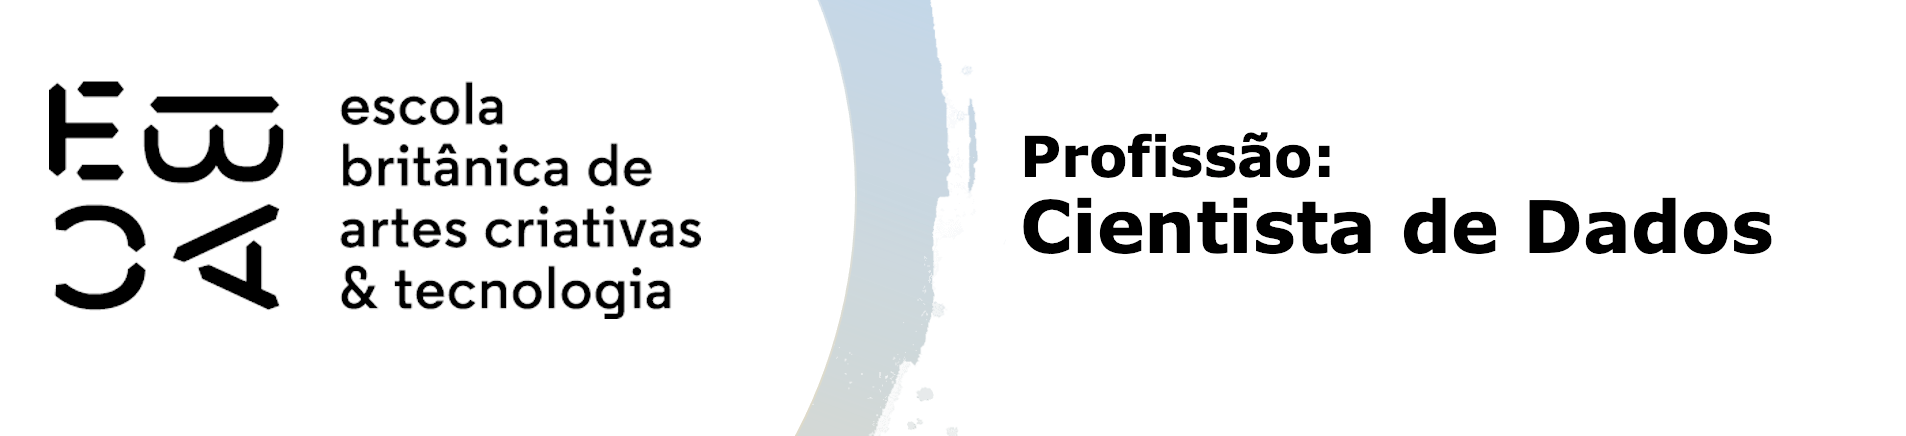

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [2]:
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng_num = peng.select_dtypes(include='number').dropna()

In [4]:
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
id,,,,
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [5]:
peng_num.isna().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [6]:
# Padronize as variáveis para média zero e desvio padrão 1
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

In [7]:
# Agrupamento hierárquico com 3 grupos
clus = AgglomerativeClustering(n_clusters=3, linkage='complete', distance_threshold=None)
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

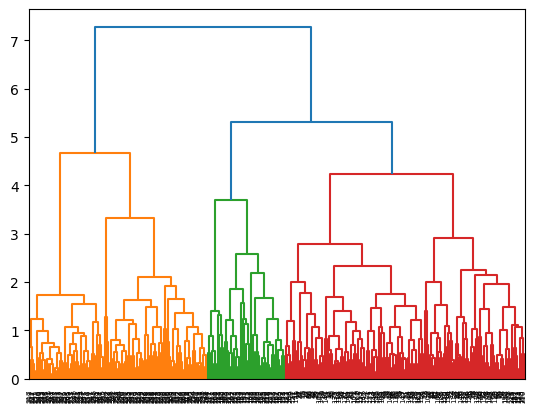

In [8]:
# Dendograma
dendograma = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [9]:
# Quantos pinguins há em cada grupo
peng_num['grupo'] = clus.labels_
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1


In [10]:
peng = peng.merge(peng_num['grupo'], how='left', on='id')
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0


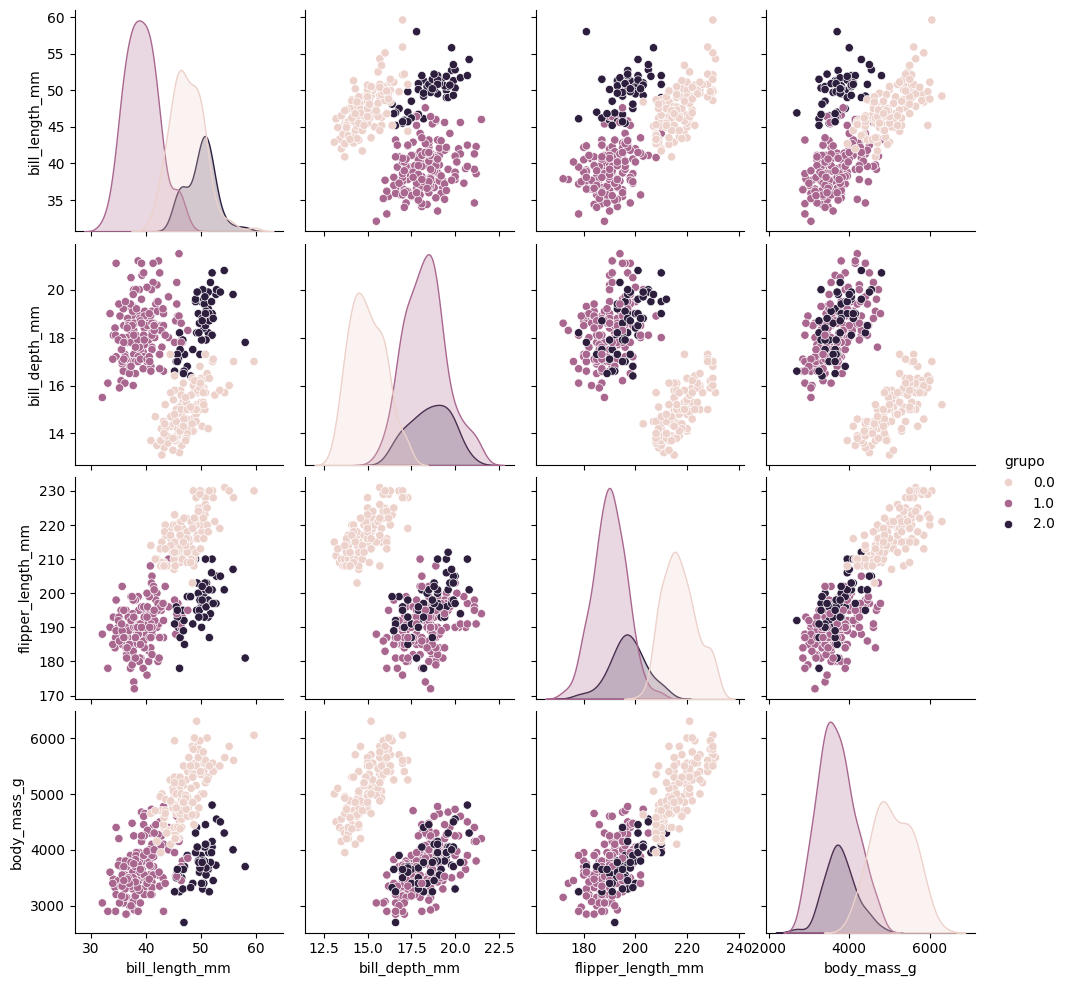

In [11]:
sns.pairplot(data=peng, hue='grupo')

In [12]:
crosstab_result = pd.crosstab(peng['species'], peng['grupo'])
print(crosstab_result)

grupo      0.0  1.0  2.0
species                 
Adelie       0  151    0
Chinstrap    0   14   54
Gentoo     123    0    0


In [13]:
# Descreva as variáveis quantitativas de cada grupo

# Primeiro, garantir que o DataFrame original 'peng' está limpo e alinhado com os grupos
peng_clean = peng.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'grupo'])

# Agrupar por 'grupo' e calcular estatísticas descritivas
group_description = peng_clean.groupby('grupo').describe()

# Mostrar as estatísticas descritivas
print(group_description)

      bill_length_mm                                                        \
               count       mean       std   min   25%    50%     75%   max   
grupo                                                                        
0.0            123.0  47.504878  3.081857  40.9  45.3  47.30  49.550  59.6   
1.0            165.0  39.283030  3.072471  32.1  37.0  39.10  41.100  47.6   
2.0             54.0  49.935185  2.659916  45.2  48.2  50.25  51.375  58.0   

      bill_depth_mm             ... flipper_length_mm        body_mass_g  \
              count       mean  ...               75%    max       count   
grupo                           ...                                        
0.0           123.0  14.982114  ...             221.0  231.0       123.0   
1.0           165.0  18.304242  ...             195.0  210.0       165.0   
2.0            54.0  18.568519  ...             201.0  212.0        54.0   

                                                                         


## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [24]:
# aça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu. (6)
clus = AgglomerativeClustering(n_clusters=6, linkage='complete', distance_threshold=None)
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=6)

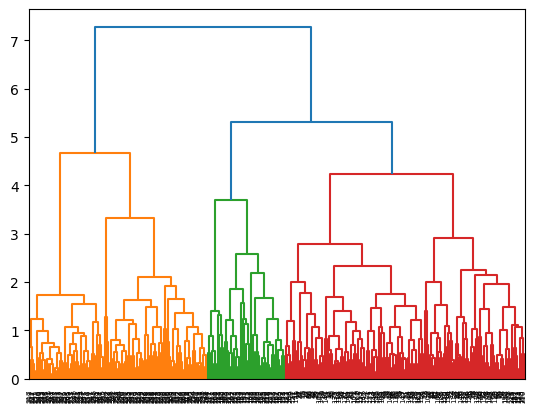

In [25]:
# Dendograma
dendograma = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

In [18]:
# Resetar o índice do DataFrame original para garantir alinhamento
peng_clean.reset_index(drop=True, inplace=True)
peng.reset_index(drop=True, inplace=True)

In [20]:
# Cruzamento de dados: Quantos pinguins de cada espécie há em cada grupo?
crosstab_species = pd.crosstab(peng_clean['species'], peng_clean['grupo'])
print("Quantos pinguins de cada espécie há em cada grupo:")
print(crosstab_species)

# Cruzamento de dados: Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
crosstab_sex_species = pd.crosstab([peng_clean['species'], peng_clean['sex']], peng_clean['grupo'])
print("\nQuantos pinguins de cada espécie machos e fêmeas há em cada grupo:")
print(crosstab_sex_species)

# Descrever as variáveis quantitativas por grupo
group_description = peng_clean.groupby('grupo').describe()
print("\nEstatísticas descritivas por grupo:")
print(group_description)

Quantos pinguins de cada espécie há em cada grupo:
grupo      0.0  1.0  2.0
species                 
Adelie       0  151    0
Chinstrap    0   14   54
Gentoo     123    0    0

Quantos pinguins de cada espécie machos e fêmeas há em cada grupo:
grupo             0.0  1.0  2.0
species   sex                  
Adelie    Female    0   73    0
          Male      0   73    0
Chinstrap Female    0   14   20
          Male      0    0   34
Gentoo    Female   58    0    0
          Male     61    0    0

Estatísticas descritivas por grupo:
      bill_length_mm                                                        \
               count       mean       std   min   25%    50%     75%   max   
grupo                                                                        
0.0            123.0  47.504878  3.081857  40.9  45.3  47.30  49.550  59.6   
1.0            165.0  39.283030  3.072471  32.1  37.0  39.10  41.100  47.6   
2.0             54.0  49.935185  2.659916  45.2  48.2  50.25  51.375  58.

In [21]:
# Quantos pinguins de cada espécie há em cada grupo?
crosstab_species = pd.crosstab(peng_clean['species'], peng_clean['grupo'])
print("Quantos pinguins de cada espécie há em cada grupo:")
print(crosstab_species)

Quantos pinguins de cada espécie há em cada grupo:
grupo      0.0  1.0  2.0
species                 
Adelie       0  151    0
Chinstrap    0   14   54
Gentoo     123    0    0


In [22]:
# Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
crosstab_sex_species = pd.crosstab([peng_clean['species'], peng_clean['sex']], peng_clean['grupo'])
print("\nQuantos pinguins de cada espécie machos e fêmeas há em cada grupo:")
print(crosstab_sex_species)


Quantos pinguins de cada espécie machos e fêmeas há em cada grupo:
grupo             0.0  1.0  2.0
species   sex                  
Adelie    Female    0   73    0
          Male      0   73    0
Chinstrap Female    0   14   20
          Male      0    0   34
Gentoo    Female   58    0    0
          Male     61    0    0


O agrupamento capturou algum padrão natural dos dados?

Os penguins do Grupo 0.0 parecem ser maiores em geral, com bicos mais longos e profundos, nadadeiras mais longas e maior massa corporal. Este grupo pode representar uma espécie específica conhecida por ser maior, como a espécie Gentoo.

Grupo 1.0 parece representar pinguins menores em tamanho, com bicos mais curtos e nadadeiras mais curtas. Pode representar uma espécie menor como a Adelie.

Grupo 2.0  pode representar uma espécie que tem bicos longos e profundos, mas é menor em massa corporal comparado ao grupo 0.0. Esse grupo pode representar a espécie Chinstrap.

Resumindo, o agrupamento parece capturar diferenças naturais nas características físicas dos pinguins, separando-os em grupos que provavelmente correspondem a diferentes espécies.